In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
from PIL import Image 
from IPython.display import Image
%matplotlib inline

In [2]:
path = 'C:/Users/SYUKTA/Music/KPT Projek/Assign1/coin/'

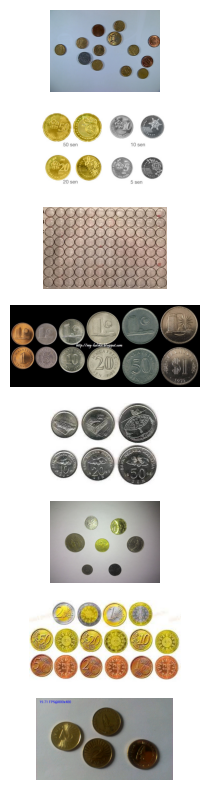

In [3]:
imagefiles = glob.glob(path+"*")
imagefiles.sort()
images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
num_images = len(images)

plt.figure(figsize=[30,10]) 
num_cols = 1
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1) 
    plt.axis('off')
    plt.imshow(images[i])

In [4]:
circle = []
newImg = []
for image in images:
    img = image.copy()
    height, width = img.shape[:2]
    maxRadius = int(1.1*(height/12)/2)
    minRadius = int(0.9*(width/12)/2)

  #convert grayscale
    gryimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    color_covert = cv2.cvtColor(gryimg, cv2.COLOR_BGR2RGB)

  #blur
    blurimg = cv2.medianBlur(gryimg, 9)

  #edge detection
    canny = cv2.Canny(blurimg,85,255)

  #dilation
    kernel = np.ones((1,1),np.uint8)
    dilation = cv2.dilate(canny, kernel, iterations=1)

  #hough transform
    rows = dilation.shape[0]
    circles = cv2.HoughCircles(dilation, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=20,
                               maxRadius=200)
    circles = np.uint16(np.around(circles))
    #print(type(circles))
    totCircle = []
    for i in circles[0,:]:
        # draw the outer circle
        img = cv2.circle(img, (i[0],i[1]), 1, (0, 100, 100), 3)
        img = cv2.circle(img, (i[0],i[1]), i[2], (255, 0, 255), 3)
        totCircle.append(i)
    circle.append(len(totCircle))
    newImg.append(img)

Total available circle is [13, 8, 66, 12, 6, 5, 18, 2]


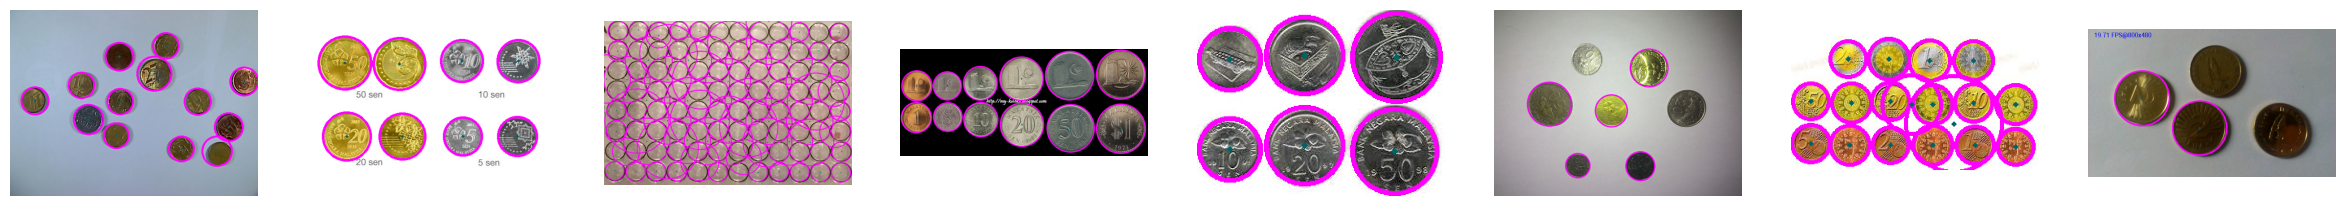

In [5]:
print('Total available circle is', circle) 
plt.figure(figsize=[30,10])
num_cols = len(images)
num_rows = math.ceil(len(images) / num_cols)
for i in range(0, len(images)):
    plt.subplot(num_rows, num_cols, i+1) 
    plt.axis('off')
    plt.imshow(newImg[i])